In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

C:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
df.shape

(7668, 15)

In [55]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [56]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}% '.format(col,pct_missing))
    

name - 0.0% 
rating - 0.010041731872717789% 
genre - 0.0% 
year - 0.0% 
released - 0.0002608242044861763% 
score - 0.0003912363067292645% 
votes - 0.0003912363067292645% 
director - 0.0% 
writer - 0.0003912363067292645% 
star - 0.00013041210224308815% 
country - 0.0003912363067292645% 
budget - 0.2831246739697444% 
gross - 0.02464788732394366% 
company - 0.002217005738132499% 
runtime - 0.0005216484089723526% 


In [57]:
df.dropna(subset= ["budget"],axis = 0, inplace=True)
df.shape

(5497, 15)

In [58]:
df.isnull().sum()

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64

In [59]:
df.dropna(subset = ['gross'],axis=0,inplace = True)

In [60]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [61]:
df.drop_duplicates()
df.shape

(5436, 15)

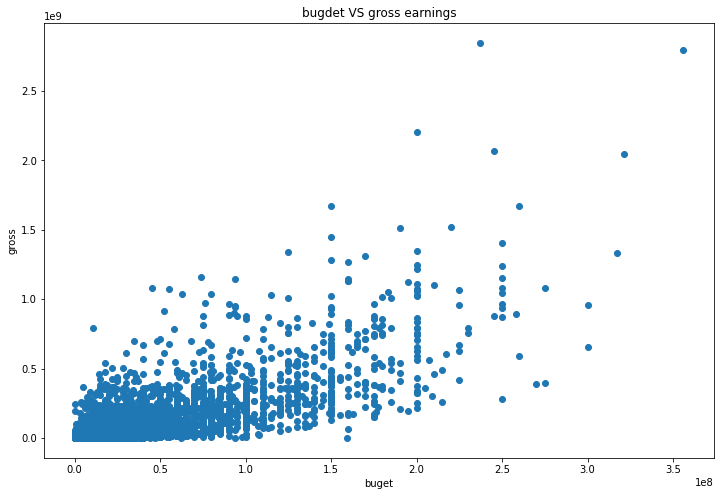

In [62]:
plt.scatter(x = df['budget'], y= df['gross'])
plt.title("bugdet VS gross earnings")
plt.xlabel("buget")
plt.ylabel("gross")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

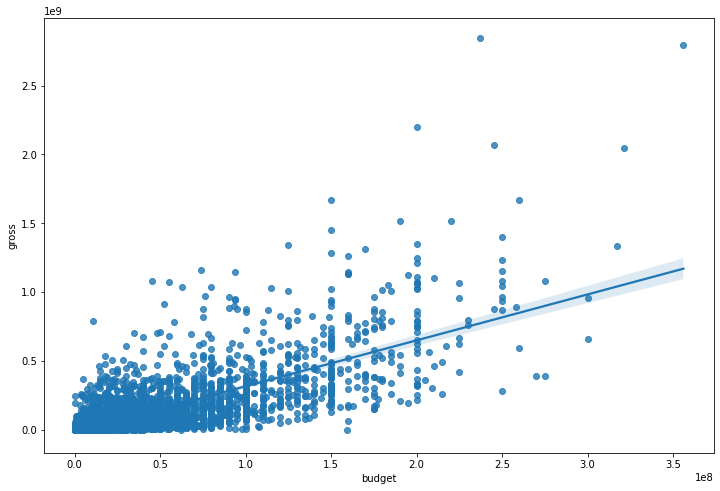

In [38]:
sns.regplot(x='budget',y='gross',data = df)

In [63]:
df.corr(method='pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


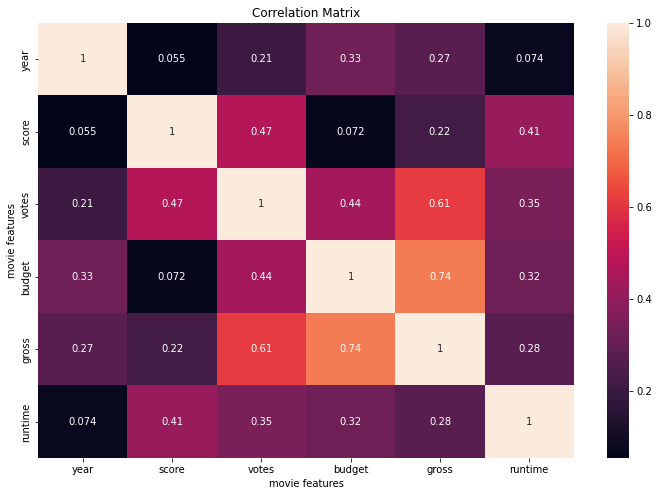

In [64]:
correlation_matrix = df.corr(method='pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

In [41]:
df_numerical = df 
for col_name in df_numerical.columns:
    if df_numerical[col_name].dtype == 'object' :
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes

df_numerical

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0


In [125]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


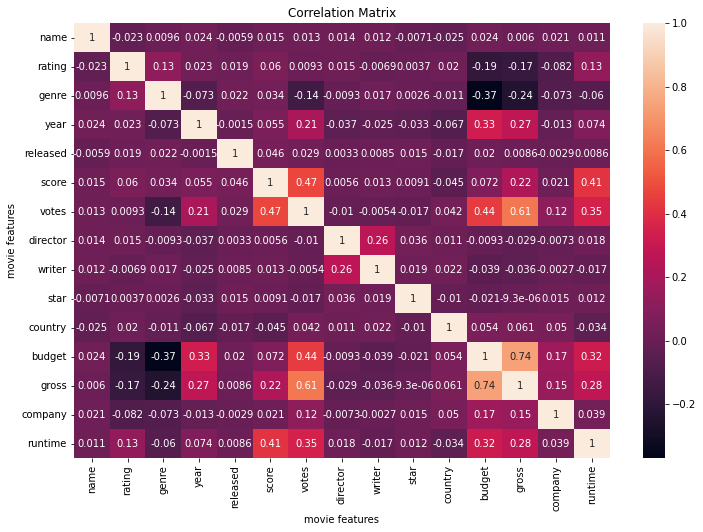

In [67]:
correlation_matrix = df_numerical.corr(method='pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

In [81]:
df_numerical.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


In [84]:
correlation_mat = df_numerical.corr()
# unstack -> pivots the level of the indexed columns in a stacked dataframe
corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.023013
          genre       0.009617
          year        0.024435
          released   -0.005896
          score       0.014955
          votes       0.012915
          director    0.013699
          writer      0.011602
          star       -0.007109
          country    -0.024555
          budget      0.023698
          gross       0.005966
          company     0.021209
          runtime     0.010800
rating    name       -0.023013
          rating      1.000000
          genre       0.128102
          year        0.022668
          released    0.018836
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company    -0.082189
          runtime     0.133239
genre     name        0.009617
          rating      0.128102
        

In [87]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
rating    gross      -0.168814
gross     rating     -0.168814
votes     genre      -0.136457
genre     votes      -0.136457
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.073026
year      genre      -0.073026
country   year       -0.066662
year      country    -0.066662
genre     runtime    -0.060186
runtime   genre      -0.060186
country   score      -0.044690
score     country    -0.044690
writer    budget     -0.039420
budget    writer     -0.039420
year      director   -0.036936
director  year       -0.036936
writer    gross      -0.035999
gross     writer     -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
year      star       -0.032770
star      year       -0.032770
gross   

In [123]:
high_corr = sorted_pairs[(sorted_pairs) > 0.50]

high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [124]:
#budget and votes have the highest correlation to the gross earnings
#company has a low corr to the gross as well as the score and runtime